# Visualising training (RL) records #

## Importing libraries ##

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)

# IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import glob
import os
import csv
import string
random.seed(100)
import pandas as pd
# import xgboost as xgb
from scipy import stats

Try to read a file.

In [2]:
csv_files = glob.glob("receipes/*.csv")
print(csv_files) 

['receipes\\02b-AstolfoMix-_01a_02a-0-2023-11-08-12-40AM-47.csv', 'receipes\\03b-AstolfoMix-_03a_04a-0-2023-11-08-08-37PM-57.csv', 'receipes\\04b-AstolfoMix-_05a_06a-0-2023-11-10-07-41PM-41.csv', 'receipes\\05b-AstolfoMix-_07a_08a-0-2023-11-10-08-59PM-28.csv', 'receipes\\06b-AstolfoMix-_09a_10a-0-2023-11-14-02-22AM-38.csv', 'receipes\\07b-AstolfoMix-_11a_12a-0-2023-11-15-01-37AM-57.csv', 'receipes\\08b-AstolfoMix-_13a_14a-0-2023-11-15-07-43PM-58.csv', 'receipes\\09b-AstolfoMix-_15a_16a-0-2023-11-16-11-01PM-23.csv', 'receipes\\10b-AstolfoMix-_17a_18a-0-2023-11-17-04-13PM-01.csv', 'receipes\\11b-AstolfoMix-_19a_20a-0-2023-11-18-07-49PM-02.csv', 'receipes\\12b-AstolfoMix-02b03b-0-2023-11-13-02-22AM-37.csv', 'receipes\\13b-AstolfoMix-04b05b-0-2023-11-12-03-35AM-27.csv', 'receipes\\14b-AstolfoMix-06b07b-0-2023-11-19-05-36AM-50.csv', 'receipes\\15b-AstolfoMix-08b09b-0-2023-11-21-12-16AM-36.csv', 'receipes\\16b-AstolfoMix-10b11b-0-2023-11-21-09-17PM-14.csv', 'receipes\\17b-AstolfoMix-12b13b-0

In [3]:
# read the data
filename = csv_files[0]
df = pd.read_csv(filename)
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,score,eval_times,iter_times
0,0.15,0.80,0.9,0.30,0.55,0.6,0.55,0.45,0.4,0.05,...,0.60,0.90,0.05,0.60,0.55,0.20,0.70,0.482368,168229.310593,168286.571787
1,0.05,0.55,0.2,0.25,0.50,0.8,0.50,0.65,0.9,0.00,...,0.65,0.95,0.20,0.85,0.90,0.05,0.25,0.484834,168229.310593,168286.571787
2,0.05,0.55,0.2,0.25,0.50,0.8,0.50,0.65,0.9,0.00,...,0.65,0.95,0.20,0.85,0.90,0.05,0.25,0.489266,168229.310593,168286.571787
3,0.05,0.55,0.1,0.25,0.50,0.8,0.50,0.65,1.0,0.00,...,0.65,0.95,0.20,0.85,0.90,0.05,0.25,0.477898,168229.310593,168286.571787
4,0.05,0.55,0.2,0.45,0.50,0.8,0.50,0.65,0.9,0.00,...,0.90,0.85,0.20,0.85,0.90,0.05,0.25,0.483061,168229.310593,168286.571787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.05,0.10,0.2,0.25,1.00,0.8,0.50,0.95,1.0,0.00,...,0.65,0.85,0.20,0.85,0.90,0.50,0.25,0.506265,168229.310593,168286.571787
98,0.05,0.10,0.1,0.25,1.00,0.8,0.50,0.95,0.9,0.00,...,0.65,0.95,0.20,0.85,0.90,0.50,0.25,0.518235,168229.310593,168286.571787
99,0.05,0.10,0.1,0.25,1.00,0.8,0.50,0.95,0.9,0.00,...,0.90,0.95,0.20,0.85,0.90,0.50,0.25,0.514736,168229.310593,168286.571787
100,0.05,0.10,0.2,0.45,1.00,0.8,0.50,0.65,0.9,0.00,...,0.65,0.95,0.20,0.85,0.90,0.50,0.25,0.512432,168229.310593,168286.571787


In [4]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', 'score', 'eval_times', 'iter_times'],
      dtype='object')

In [5]:
# There may be early exit
df['score']

0      0.482368
1      0.484834
2      0.489266
3      0.477898
4      0.483061
         ...   
97     0.506265
98     0.518235
99     0.514736
100    0.512432
101    0.511200
Name: score, Length: 102, dtype: float64

Scan folder and construct another csv for comparasion.

In [6]:
csv_cmp = pd.DataFrame()
csv_df = {}

def make_csv_cmp(carr):
    for c in carr:
        ckey = c.split('-')[0].split('\\')[1]
        csv_df[ckey] = pd.read_csv(c).copy()
        csv_cmp[ckey] = csv_df[ckey]['score']

make_csv_cmp(csv_files)

Plot for comparasion.

<AxesSubplot: title={'center': 'RL Results'}, xlabel='iter', ylabel='sigmoid(ImageReward)'>

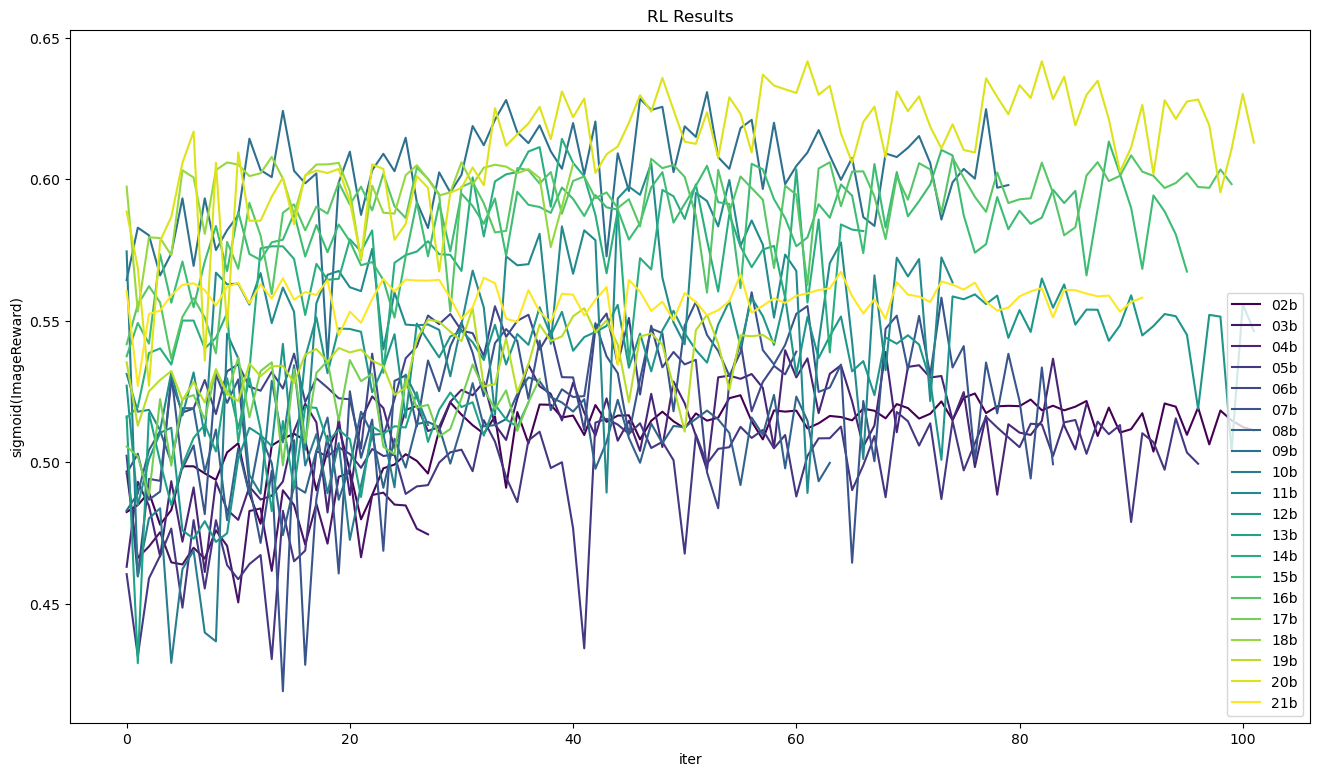

In [7]:
csv_cmp.plot.line(title='RL Results', xlabel='iter', ylabel='sigmoid(ImageReward)', colormap='viridis', figsize=(16,9))

## Observation

- `09b` is exceptionally high. It is a merge of `_15a` and `_16a`, which is... [BB95 Furry Mix](https://civitai.com/models/17649/bb95-furry-mix) and [ORCHIDHEART](https://huggingface.co/reroti/ORCHIDHEART).
- Interprepting "sigmoid score over a normalized score" is a bit tricky. Normalized score = normal distribution = showing standard deviation and percentile. Perfect score, s.d. goes to infinity, percentile goes to 100, Sigmoid goes to 1. 
- It will show how ImageReward thinks the 12 payloads "looks" in general, comparing to IR's training dataset.

|s.d.|Percentile|S(score)|
|---|---|---|
|-2|4.56|0.1192|
|-1|31.74|0.2689|
|0|50.00|0.5000|
|1|68.26|0.7311|
|2|95.44|0.8808|

- The highest is `20`. It is no suprise because of merging 5-6 models to gain some "experience of getting high score".
- The expected "target score" is `21b`'s 0.5672, which the generated image is really showing the expected content instead of exploiting the reward model (by color tone, focusing on human face etc).